In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
import tensorflow

In [2]:
nutrition = pd.read_pickle("./Nutrition_Full_Features.pkl")
nutrition

,name,Food Group,Price (£),Weight (GRAMS),Price per Weight (£/100Gram),Carbon Group,Land use (m2/100g),GHG(kgco2eq/100g),Water use (L/100g),Acidifying emissions(kgSO2eq per 100g),...,"Carotene, alpha (mcg)",Lycopene (mcg),Lutein + Zeaxanthin (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)",20:5 n-3 (EPA) (mg),22:5 n-3 (DPA) (mg),22:6 n-3 (DHA) (mg),Caffeine (mg),Theobromine (mg)
1,Waffles Buttermilk Frozen Ready-To-Heat,Baked Foods,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,63.0,4530.0,1445.0,12.0,0.0,7.0,0.0,0.0
2,Waffle Buttermilk Frozen Ready-To-Heat Toasted,Baked Foods,1.50,567.0,0.264550,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,66.0,5292.0,1502.0,13.0,0.0,8.0,0.0,0.0
5,Dutch Apple Pie,Baked Foods,2.80,500.0,0.560000,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,1.0,42.0,5797.0,2117.0,0.0,0.0,0.0,0.0,0.0
9,Bread White Wheat,Baked Foods,0.95,800.0,0.118750,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,25.0,393.0,973.0,3.0,0.0,0.0,0.0,0.0
10,Bagels Wheat,Baked Foods,1.60,450.0,0.355556,Bread products,0.3482,0.1441,56.7,0.001209,...,0.0,0.0,88.0,290.0,936.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,Plantain Fried,Vegetables,0.90,85.0,1.058824,Other vegetables,0.0310,0.0455,8.3,0.000531,...,418.0,0.0,29.0,4099.0,4079.0,0.0,0.0,0.0,0.0,0.0
1219,Romaine Lettuce Raw,Vegetables,1.00,400.0,0.250000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,0.0,0.0,4204.0,7.0,126.0,0.0,0.0,0.0,0.0,0.0
1220,Palak Paneer,Vegetables,3.75,500.0,0.750000,Cheese,8.0642,2.1240,473.5,0.014894,...,12.0,313.0,4097.0,2402.0,2112.0,0.0,0.0,0.0,0.0,0.0
1221,Carrots Raw Salad,Vegetables,0.41,1000.0,0.041000,Other vegetables,0.0310,0.0455,8.3,0.000531,...,2157.0,1.0,162.0,3498.0,9319.0,0.0,0.0,1.0,0.0,0.0


In [3]:
#Data for features
X = nutrition.iloc[:, 11:]
y = nutrition.iloc[:, 4]


In [4]:
X

,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Saturated Fats (g),Calcium (mg),"Iron, Fe (mg)","Potassium, K (mg)",...,"Carotene, alpha (mcg)",Lycopene (mcg),Lutein + Zeaxanthin (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)",20:5 n-3 (EPA) (mg),22:5 n-3 (DPA) (mg),22:6 n-3 (DHA) (mg),Caffeine (mg),Theobromine (mg)
1,273,9.22,6.58,41.05,4.30,2.2,1.898,279,6.04,126.0,...,0.0,0.0,63.0,4530.0,1445.0,12.0,0.0,7.0,0.0,0.0
2,309,9.49,7.42,48.39,4.41,2.6,2.275,299,6.59,138.0,...,0.0,0.0,66.0,5292.0,1502.0,13.0,0.0,8.0,0.0,0.0
5,290,11.50,2.17,44.54,22.02,1.6,2.313,14,0.91,76.0,...,0.0,1.0,42.0,5797.0,2117.0,0.0,0.0,0.0,0.0,0.0
9,238,2.15,10.66,43.91,5.00,9.2,0.630,684,4.89,127.0,...,0.0,0.0,25.0,393.0,973.0,3.0,0.0,0.0,0.0,0.0
10,250,1.53,10.20,48.89,6.12,4.1,0.000,20,2.76,165.0,...,0.0,0.0,88.0,290.0,936.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,241,10.16,1.66,40.60,19.10,2.9,1.507,4,0.78,572.0,...,418.0,0.0,29.0,4099.0,4079.0,0.0,0.0,0.0,0.0,0.0
1219,19,0.27,1.39,3.78,0.71,3.1,0.053,62,0.90,327.0,...,0.0,0.0,4204.0,7.0,126.0,0.0,0.0,0.0,0.0,0.0
1220,96,6.84,5.23,4.32,1.89,1.2,1.486,70,1.15,269.0,...,12.0,313.0,4097.0,2402.0,2112.0,0.0,0.0,0.0,0.0,0.0
1221,208,15.70,1.22,17.17,11.23,2.3,2.452,30,0.49,309.0,...,2157.0,1.0,162.0,3498.0,9319.0,0.0,0.0,1.0,0.0,0.0


In [5]:
y

1       0.264550
2       0.264550
5       0.560000
9       0.118750
10      0.355556
          ...   
1218    1.058824
1219    0.250000
1220    0.750000
1221    0.041000
1222    0.171429
Name: Price per Weight (£/100Gram), Length: 1042, dtype: float64

In [6]:
#only normalising X not y. Is this right?
norm_X = preprocessing.normalize(X, axis=0) #collum instead of row
norm_X = pd.DataFrame(norm_X, columns = X.columns)
X=norm_X
X

,Calories,Fat (g),Protein (g),Carbohydrate (g),Sugars (g),Fiber (g),Saturated Fats (g),Calcium (mg),"Iron, Fe (mg)","Potassium, K (mg)",...,"Carotene, alpha (mcg)",Lycopene (mcg),Lutein + Zeaxanthin (mcg),"Fatty acids, total monounsaturated (mg)","Fatty acids, total polyunsaturated (mg)",20:5 n-3 (EPA) (mg),22:5 n-3 (DPA) (mg),22:6 n-3 (DHA) (mg),Caffeine (mg),Theobromine (mg)
0,0.031145,0.016807,0.014553,0.034248,0.008243,0.010749,0.009220,0.022376,0.023213,0.005026,...,0.000000,0.000000,0.001743,0.019046,0.009061,0.006177,0.0,0.002314,0.0,0.0
1,0.035252,0.017299,0.016411,0.040371,0.008454,0.012704,0.011051,0.023980,0.025326,0.005505,...,0.000000,0.000000,0.001826,0.022249,0.009419,0.006692,0.0,0.002645,0.0,0.0
2,0.033084,0.020963,0.004799,0.037159,0.042212,0.007818,0.011236,0.001123,0.003497,0.003032,...,0.000000,0.000015,0.001162,0.024373,0.013275,0.000000,0.0,0.000000,0.0,0.0
3,0.027152,0.003919,0.023577,0.036634,0.009585,0.044952,0.003060,0.054857,0.018793,0.005066,...,0.000000,0.000000,0.000692,0.001652,0.006101,0.001544,0.0,0.000000,0.0,0.0
4,0.028521,0.002789,0.022559,0.040788,0.011732,0.020033,0.000000,0.001604,0.010607,0.006582,...,0.000000,0.000000,0.002435,0.001219,0.005869,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,0.027494,0.018520,0.003671,0.033872,0.036615,0.014170,0.007320,0.000321,0.002998,0.022818,...,0.041963,0.000000,0.000802,0.017234,0.025578,0.000000,0.0,0.000000,0.0,0.0
1038,0.002168,0.000492,0.003074,0.003154,0.001361,0.015147,0.000257,0.004972,0.003459,0.013045,...,0.000000,0.000000,0.116315,0.000029,0.000790,0.000000,0.0,0.000000,0.0,0.0
1039,0.010952,0.012468,0.011567,0.003604,0.003623,0.005863,0.007218,0.005614,0.004420,0.010731,...,0.001205,0.004794,0.113355,0.010099,0.013244,0.000000,0.0,0.000000,0.0,0.0
1040,0.023729,0.028618,0.002698,0.014325,0.021528,0.011238,0.011911,0.002406,0.001883,0.012327,...,0.216541,0.000015,0.004482,0.014707,0.058437,0.000000,0.0,0.000331,0.0,0.0


In [7]:
y = np.ravel(y)
X = X.values

In [8]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

In [16]:
from keras.layers import Dense, Activation
from keras.models import Sequential

# Feature Scaling Do I need this?
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 40))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))


# Adding the output layer

model.add(Dense(units = 1))

#model.add(Dense(1))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 10, epochs = 100)



Epoch 1/100
84/84 [==============================] - 0s 683us/step - loss: 13.2589
Epoch 2/100
84/84 [==============================] - 0s 754us/step - loss: 242.9582
Epoch 3/100
84/84 [==============================] - 0s 843us/step - loss: 43.5054
Epoch 4/100
84/84 [==============================] - 0s 1ms/step - loss: 18.0091
Epoch 5/100
84/84 [==============================] - 0s 811us/step - loss: 96.0808
Epoch 6/100
84/84 [==============================] - 0s 757us/step - loss: 39.0556
Epoch 7/100
84/84 [==============================] - 0s 730us/step - loss: 39.1507
Epoch 8/100
84/84 [==============================] - 0s 774us/step - loss: 12.3717
Epoch 9/100
84/84 [==============================] - 0s 808us/step - loss: 17.6478
Epoch 10/100
84/84 [==============================] - 0s 879us/step - loss: 69.7233
Epoch 11/100
84/84 [==============================] - 0s 744us/step - loss: 14.8621
Epoch 12/100
84/84 [==============================] - 0s 698us/step - loss: 60.5645
Ep

84/84 [==============================] - 0s 635us/step - loss: 45.0270
Epoch 99/100
84/84 [==============================] - 0s 631us/step - loss: 66.4154
Epoch 100/100
84/84 [==============================] - 0s 571us/step - loss: 32.7400


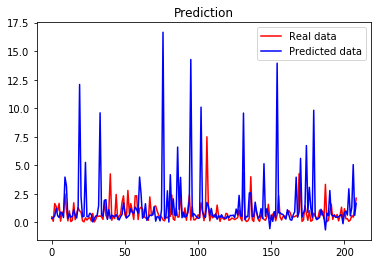

In [10]:
y_pred = model.predict(X_test)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

cite: https://stackoverflow.com/questions/49008074/how-to-create-a-neural-network-for-regression

In [11]:
#Why are my errors all of a sudden so because of overfitting
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.150892795106928
Mean Squared Error: 6.642636369633886
Root Mean Squared Error: 2.577331249497023


In [12]:
import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Feature Scaling Do I need this?
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 40))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))


# Adding the output layer

model.add(Dense(units = 1))

#model.add(Dense(1))
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 10, epochs = 100)



Epoch 1/100
84/84 [==============================] - 0s 656us/step - loss: 21.0428
Epoch 2/100
84/84 [==============================] - 0s 647us/step - loss: 34.3301
Epoch 3/100
84/84 [==============================] - 0s 680us/step - loss: 65.6514
Epoch 4/100
84/84 [==============================] - 0s 708us/step - loss: 146.8145
Epoch 5/100
84/84 [==============================] - 0s 704us/step - loss: 116.1089
Epoch 6/100
84/84 [==============================] - 0s 733us/step - loss: 3.6493
Epoch 7/100
84/84 [==============================] - 0s 701us/step - loss: 19.1355
Epoch 8/100
84/84 [==============================] - 0s 681us/step - loss: 6.1419
Epoch 9/100
84/84 [==============================] - 0s 638us/step - loss: 11.7983
Epoch 10/100
84/84 [==============================] - 0s 629us/step - loss: 240.7425
Epoch 11/100
84/84 [==============================] - 0s 601us/step - loss: 192.8851
Epoch 12/100
84/84 [==============================] - 0s 576us/step - loss: 41.0241

84/84 [==============================] - 0s 630us/step - loss: 63.7017
Epoch 99/100
84/84 [==============================] - 0s 624us/step - loss: 48.2894
Epoch 100/100
84/84 [==============================] - 0s 628us/step - loss: 13.9790


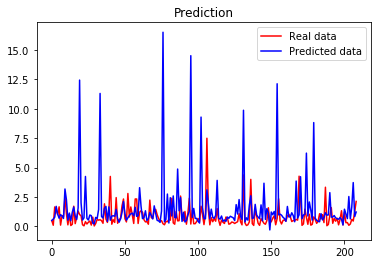

In [13]:
y_pred = model.predict(X_test)

plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [14]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.1123173024487358
Mean Squared Error: 6.002510457829411
Root Mean Squared Error: 2.4500021342499707
